[0.89258163 0.25078571] [[ 0.0024665  -0.01151035]
 [-0.01151035  0.08057244]]


<ErrorbarContainer object of 3 artists>

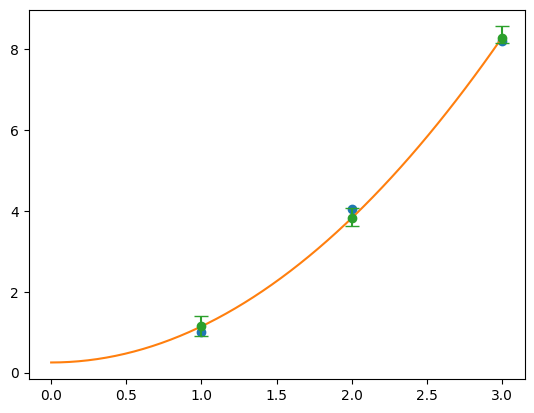

In [28]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit



y = [1,4.0505,8.198]
x= [1,2,3]

quatfit = lambda x,a,b: a*x**2 +b
popt, pcov = curve_fit(
    quatfit, x, 
    y
    )
print(popt, pcov)
plt.plot(x, y, 'o')
xlong = np.linspace(0,np.max(x))
plt.plot(xlong, [popt[0]*x**2+popt[1] for x in xlong])
plt.errorbar(x, [popt[0]*x**2+popt[1] for x in x], [[pcov[0][1]*x**2+popt[1] for x in x],[pcov[0][0]*x**2+popt[1] for x in x]], fmt='o', capsize=5)

In [38]:
legend = {5: [4]}
if legend.get(5,[]) == []:
    legend[5] = ["a"+str(5)]
else:
    legend[5] += ["a"+str(5)]
legend[5] += "b"
print(legend)

{5: [4, 'a5', 'b']}


In [9]:
a = [[1,2],[3,1],[4,2],[5,6]]
b = [i for i in a if 1 in i]
print(b)

[[1, 2], [3, 1]]


In [6]:
def empty_log(file_path):
    with open(file_path, 'w'):
        pass
#empty_log("/home/fabrice/Dokumente/Masterarbeit/AutomatedPERTools/tutorial_notebooks/pauli_lindblad_per/experiment.log")
empty_log("tutorial_notebooks\\pauli_lindblad_per\\experiment.log")

In [14]:
def print_log_file(file_path):
    try:
        with open(file_path, 'r') as file:
            for line in file:
                print(line, end='')
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    #empty_log()
#print_log_file("/home/fabrice/Dokumente/Masterarbeit/AutomatedPERTools/tutorial_notebooks/pauli_lindblad_per/experiment.log")
print_log_file("tutorial_notebooks\\pauli_lindblad_per\\experiment.log")

2024-07-08 22:42:04,156 Could not load 'ibm_backend': No module named 'qiskit.primitives.containers'
2024-07-08 22:42:04,163 Could not load 'ibm_dynamic_circuits': No module named 'qiskit.primitives.containers'
2024-07-08 22:42:04,186 Could not load 'ibm_backend': No module named 'qiskit.primitives.containers'
2024-07-08 22:42:04,193 Could not load 'ibm_dynamic_circuits': No module named 'qiskit.primitives.containers'
2024-07-08 22:42:04,220 Could not load 'ibm_backend': No module named 'qiskit.primitives.containers'
2024-07-08 22:42:04,227 Could not load 'ibm_dynamic_circuits': No module named 'qiskit.primitives.containers'
2024-07-08 22:42:04,257 Could not load 'ibm_backend': No module named 'qiskit.primitives.containers'
2024-07-08 22:42:04,264 Could not load 'ibm_dynamic_circuits': No module named 'qiskit.primitives.containers'
2024-07-08 22:42:04,300 Could not load 'ibm_backend': No module named 'qiskit.primitives.containers'
2024-07-08 22:42:04,308 Could not load 'ibm_dynamic_cir

### Determination of measurement bases
Find the 9 Bases in which we need to measure

### Generate the Sparse Model
For 2 qubits: Fill in the Pauli I's.
For more then 3: ???

.evolve(layer) applies the layer to the pauli and gives back the result
nophase just removes a - and i

### Generate circuit instances for learning
Set prep Basis

repeat:
- Twirl
- cnot gate

Twirl end

Use meas Basis

### Get expectation value from single instance
Just calculates the expectation value $\in$ [1,-1]

### Test Noise model here:
Make it so a Random Pauli gate is performed after every "cx" or "cz" gate, and make it so that the "II" gate has the, by far, highest chance

'real_errors' saves the diagonal elements of the transfere matrix, as those are the only ones left after twirling.

## Example tomography procedure
### Collect data
- Generate Circut at different depths
- Simulate the circut 'samples' times
- Get average over all samples
- fit the resulte to the depths with the assumtion that overall fidelity is = (fa^+*fa)^n
- take answere at n=2 and have fa^+\*fa = sqrt((fa^+\*fa)^n)


## Full Procedure
- Degeneracy: Sometimes we have G and G^+ in the same pool. We don't need both
- Why the compose here
- Pairs are used for single basis because they can not be combined with anything else. Everything else can be made with deductions between the measurements but not these as they are their own conjugate. So we need to measure the f's seperatly!